Daniel Shats

ID: 956919864

236605

# 📑 Report!!!

Trained weights are in `models_moco2/` folder.

Training graphs are in `final_graphs/` folder.

Logs are in `logfiles/` folder.

The important code file is `mocoV2.ipynb`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image
import re

Note: Unfortunately, this model was trained without color jitter and Gaussian blur transforms. They just took way too long (holding up cpu) and I really only had 2 rounds of serious training on course servers. I still got decent accuracy but it definetly could have been better if I used those transforms

## Pretext Training Logs Summary:

Pretext Training of MOCOv2:

In [2]:
file = './logfiles/losses_r50_24hr_noblur.txt'
file = open(file, 'r')
lines = file.readlines()

First 35 losses and last 15

In [3]:
lines[0:35] + ['..........'] +  lines[-15:-1]

['\n',
 'epoch 0: 27.070098887495444\n',
 'epoch 1: 16.459640376016395\n',
 'epoch 2: 143.47349380514248\n',
 'epoch 3: 1797.0032582834465\n',
 'epoch 4: 7127.296426370841\n',
 'epoch 5: 13314.42970286259\n',
 'epoch 6: 11625.38952906602\n',
 'epoch 7: 8621.893117684085\n',
 'epoch 8: 2986.1343265163655\n',
 'epoch 9: 1786.2921464254662\n',
 'epoch 10: 2031.6508152614645\n',
 'epoch 11: 3130.5872599889026\n',
 'epoch 12: 2551.6876192078703\n',
 'epoch 13: 1345.941356250218\n',
 'epoch 14: 721.4416154262667\n',
 'epoch 15: 421.9579484706022\n',
 'epoch 16: 323.09846792091315\n',
 'epoch 17: 225.99338297616868\n',
 'epoch 18: 61.46222767537954\n',
 'epoch 19: 30.77584834325881\n',
 'epoch 20: 14.10639968210337\n',
 'epoch 21: 8.767711791862435\n',
 'epoch 22: 8.578591596512567\n',
 'epoch 23: 8.063353327666821\n',
 'epoch 24: 7.845703861340374\n',
 'epoch 25: 7.7598607134656845\n',
 'epoch 26: 7.833730327839754\n',
 'epoch 27: 7.536279220970309\n',
 'epoch 28: 7.554665883382161\n',
 'epo

... if only I saved the list of losses for this one ... oh well...

In [4]:
r = re.compile(r'\d+\.\d+')
losses = [float(re.search(r, l).group()) for l in lines[1:]]

Here are those losses per epoch plotted with a log scale:

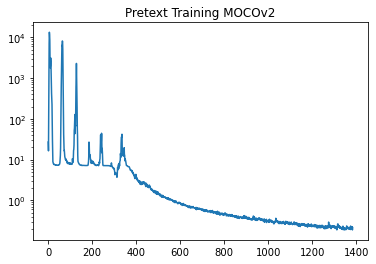

In [5]:
plt.plot(list(range(len(losses))), losses)
plt.yscale('log')
plt.title('Pretext Training MOCOv2')
plt.show()

So seems like the model at first has a hard time training. This may be due to the the fact that the dictionary starts out totally random. Eventually, it fills up enough with fairly reasonable feature representations that it can actually consider them real negative samples and training goes smoothly after like 320 epochs.

... and in case you wanted to see the slurm output:

In [6]:
file = './logfiles/slurm_r50_24hr_noblur.out'
file = open(file, 'r')
lines = file.readlines()

I think that due to the fact that I used `from tqdm.notebook import tqdm` rather than `from tqdm import tqdm`, the full tqdm loading bar doesnt actually load for slurm, and it also doesnt list the times per epoch :(

But, for some strange reason it does actually list the running time of the 1st epoch, and also printed it out a million times. So if youre curious what the running time per epoch was, its 1:24. You can see that below:

In [7]:
lines[695:703]

 '100%|█████████▉| 1556038656/1557161267 [01:24<00:00, 18952477.70it/s]\n',
 '1557161984it [01:24, 18483409.06it/s]                                \n',
 '/home/shats/miniconda3/envs/tutorial4/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.\n']

Feel free to open `./logfiles/slurm_r50_24hr_noblur.out` to see the rest of the slurm logs. Warning: its ugly

As a note, I realize that this is almost 3x as slow as the benchmark implementation, but it ran in 0.7seconds per epoch on my personal RTX 2070 8gb machine, and I thought the course servers were faster than mine. I think this could be due to the error in the above lines `UserWarning: This DataLoader will create 6 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.`...

So maybe if I had made num_workers=4 it would have run faster?

## Downstream Training Summary:

Note: I did all the downstream training on my own rtx2070 box, so I dont have slurm logs for this

In [8]:
file = './logfiles/downstream_losses_r50_24hr.txt'
file = open(file, 'r')
lines = file.readlines()

Summary of the log file:

In [9]:
lines[0:15] + ['.................'] +  lines[-15:-1]

['\n',
 'epoch 0| train:334.8313527107239 | val:137.77133750915527 | top1:0.3846366167549164 | top5:0.7741575462202872\n',
 'epoch 1| train:323.6134903430939 | val:133.36787247657776 | top1:0.4890552999511842 | top5:0.8485143050070731\n',
 'epoch 2| train:313.61406230926514 | val:129.24301981925964 | top1:0.5394705264799057 | top5:0.8913690476648269\n',
 'epoch 3| train:304.4272804260254 | val:125.56275451183319 | top1:0.573996736157325 | top5:0.9054699501683635\n',
 'epoch 4| train:296.03338277339935 | val:121.97896373271942 | top1:0.5815452193060229 | top5:0.9150585637938592\n',
 'epoch 5| train:288.39794993400574 | val:118.77195131778717 | top1:0.5850494431872522 | top5:0.9203389017812668\n',
 'epoch 6| train:281.27886867523193 | val:115.8911052942276 | top1:0.5981782838221519 | top5:0.9271553379874076\n',
 'epoch 7| train:274.95780658721924 | val:113.00747990608215 | top1:0.6015144971109205 | top5:0.9289194508906333\n',
 'epoch 8| train:268.2429155111313 | val:110.09775173664093 | 

And here are graphs which I saved of these values:

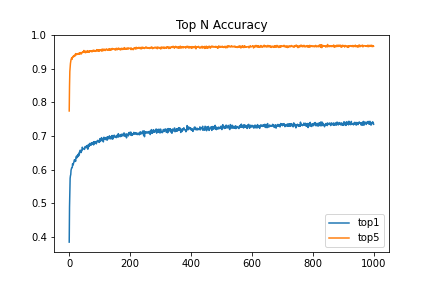

In [10]:
# Top 1 and Top 5 accuracy for whole training run
Image('./final_graphs/top_n_24hr.png')

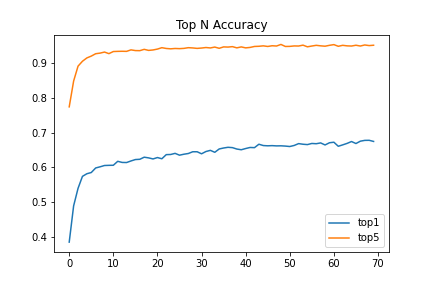

In [11]:
# Top 1 and Top 5 accuracy for only first 70 epochs (you can see the beginning better)
Image('./final_graphs/top_n_24hr_70ep.png')

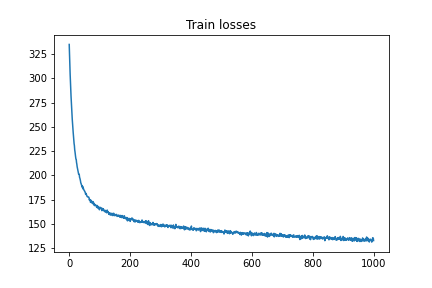

In [12]:
# Training dataset losses
Image('./final_graphs/train_losses_24hr.png')

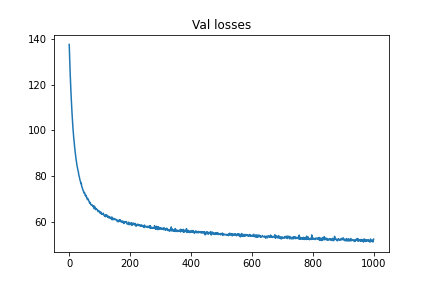

In [13]:
# Validation subset losses
Image('./final_graphs/val_losses_24hr.png')

- - - - 
- - - - 

Maximum Top 1 Accuracy: **0.7436875960519237**

- - - -
- - - - 

# Example Model Performance

In [14]:
import torchvision
import torch
from torch import nn
import os
from torchvision.transforms import transforms
import numpy as np

In [15]:
### make dataloader ###

### Assumes youve downloaded imagenette2 to ./data already !!! ###

batch_size = 8

dataset_url = 'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2.tgz'
dataset_filename = dataset_url.split('/')[-1]
data_path = './data'
dataset_foldername = dataset_filename.split('.')[0]
dataset_folderpath = os.path.join(data_path,dataset_foldername)
val_folder_dir = os.path.join(dataset_folderpath,'val')


size  = 224
ks = (int(0.1 * size) // 2) * 2 + 1 # should be odd
__imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                    'std': [0.229, 0.224, 0.225]}

val_tfms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(**__imagenet_stats)
    ])
val_dataset = torchvision.datasets.ImageFolder(val_folder_dir, val_tfms)
val_dataloader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=batch_size,
    num_workers=6,
    shuffle=True
)

def get_numpy_samples(inputs):
        mean = torch.as_tensor(__imagenet_stats['mean'], dtype=inputs.dtype, device=inputs.device)
        std = torch.as_tensor(__imagenet_stats['std'], dtype=inputs.dtype, device=inputs.device)
        inputs = inputs * std.view(1, -1, 1, 1) + mean.view(1, -1, 1, 1)
        inputs = inputs.numpy()
        inputs = np.transpose(inputs, (0,2,3,1))
        return inputs

In [16]:
### define model ###

# make resnet model, add its mlp so we can load state dict
model = torchvision.models.resnet50(num_classes=128, pretrained=False)
model.fc = nn.Sequential(nn.Linear(2048, len(val_dataset.classes)))

# backbone = torchvision.models.vgg19(num_classes=C, pretrained=False)
model.load_state_dict(torch.load('./models_moco2/FINAL_re-trained_backbone_24hr.pth'))

# This is not the best model, just the last one. I didnt actually save the best model here.

<All keys matched successfully>

In [17]:
lbl_dict = {
    0:'tench',
    1:'English springer',
    2:'cassette player',
    3:'chain saw',
    4:'church',
    5:'French horn',
    6:'garbage truck',
    7:'gas pump',
    8:'golf ball',
    9:'parachute'
}

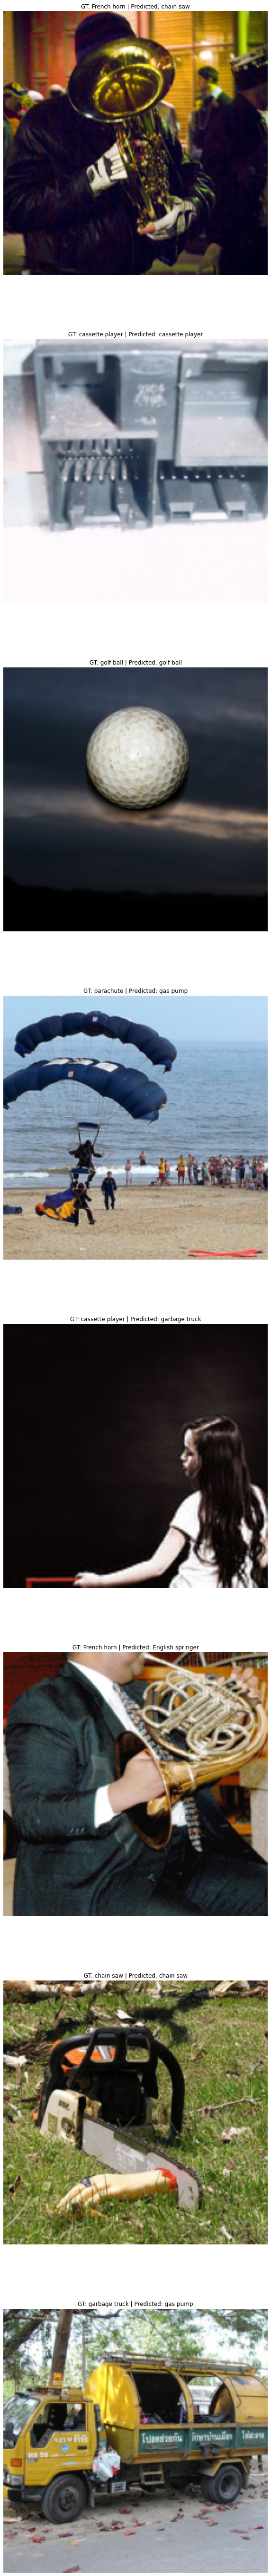

In [18]:
fig, axes = plt.subplots(nrows=batch_size, ncols=1, figsize=(10,100))
for (input1, label) in val_dataloader:
    np_inputs1 = get_numpy_samples(input1)
    preds = model(torch.tensor(np_inputs1.transpose(0, 3, 2, 1)))
    for row in range(batch_size):
        axes[row].axis("off")
        axes[row].set_title('GT: {} | Predicted: {}'.format(lbl_dict[int(label[row].item())], lbl_dict[int(preds[row].argmax().item())]))
        axes[row].imshow(np_inputs1[row])
    break
plt.show()

As a note, the above model is not actually the best one, its the last one, which is after epoch 999. The best one was actually at epoch 918 (but I didnt save it)

I have no idea why but the images are tiny when I convert to pdf. If you want to see them well, please take a look at `Report.ipynb`